# Exploring the UTx000 Extension Beacon Data
(Known as BPEACE2 in the [GH repo](https://github.com/intelligent-environments-lab/utx000))

# Package Import

In [1]:
import sys
sys.path.append('../')

from src.features import build_features
from src.visualization import visualize
from src.reports import make_report

import pandas as pd
import numpy as np

from datetime import datetime, timedelta

# Data Import

In [2]:
id_crossover = pd.read_excel('../data/raw/bpeace2/admin/id_crossover.xlsx',sheet_name='beacon',parse_dates=[3,4,5])
# show if off:
id_crossover.head()

,REDCap,Beiwe,Beacon,start_date,end_date,move_date,lat,long,original_start,original_end,original_move
0,10,kyj367pi,1,2020-06-08,2020-09-03,2020-07-31,30.312614,-97.732338,2020-06-06,2020-09-03,2020-07-31
1,55,745vq78e,5,2020-06-08,2020-09-09,NaT,30.288012,-97.751201,2020-06-08,2020-09-09,2020-09-09
2,61,itmylz3g,6,2020-06-15,NaT,NaT,29.855371,-95.741200,2020-06-15,NaT,2020-09-14
3,0,zdpffrox,7,2020-06-02,2020-09-14,NaT,30.326815,-97.744665,2020-06-02,2020-09-14,2020-09-14
4,43,xlw5ntd5,10,2020-06-06,NaT,2020-08-10,30.351693,-97.614524,2020-06-06,NaT,2020-08-10


In [3]:
beacon_data = pd.read_csv('../data/processed/bpeace2-beacon.csv',index_col=0,parse_dates=True)
# show it off:
beacon_data.head()

,TVOC,eCO2,Lux,Visible,Infrared,NO2,T_NO2,RH_NO2,CO,T_CO,...,PM_N_4,PM_N_10,PM_C_1,PM_C_2p5,PM_C_4,PM_C_10,Beacon,Beiwe,Fitbit,REDCap
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-01 17:15:00,0.0,400.0,-100.0,-100.0,-100.0,669362.437500,22.0,55.250000,-0.1,-100.0,...,45.066567,45.351743,5.528357,13.813757,20.262206,21.551901,30,idbkjh8u,22,4
2020-06-01 17:20:00,0.0,400.0,-100.0,-100.0,-100.0,40906.066667,22.0,54.166667,-0.1,-100.0,...,42.536739,42.735695,5.247584,11.059922,15.519927,16.411934,30,idbkjh8u,22,4
2020-06-01 17:25:00,0.0,400.0,-100.0,-100.0,-100.0,22156.680000,23.0,53.000000,-0.1,-100.0,...,37.865118,38.020652,4.680348,9.237404,12.707863,13.401960,30,idbkjh8u,22,4
2020-06-01 17:30:00,0.0,400.0,-100.0,-100.0,-100.0,15907.500000,23.0,52.000000,-0.1,-100.0,...,41.361894,41.520351,5.117388,9.768085,13.294004,13.999194,30,idbkjh8u,22,4
2020-06-01 17:35:00,0.0,400.0,-100.0,-100.0,-100.0,12495.000000,23.0,51.960000,-0.1,-100.0,...,40.015350,40.204947,4.935506,10.472929,14.724953,15.575364,30,idbkjh8u,22,4


In [4]:
gps_data = pd.read_csv('../data/processed/bpeace2-gps.csv',index_col=0,parse_dates=True)
# show it off:
gps_data.head()

,Lat,Long,Alt,Accuracy,Beiwe
Time,,,,,
2020-06-01 10:35:00,32.92302,-96.96281,152.32799,65.0,2xtqkfz1
2020-06-01 10:40:00,[],[],[],[],2xtqkfz1
2020-06-01 10:45:00,[],[],[],[],2xtqkfz1
2020-06-01 10:50:00,[],[],[],[],2xtqkfz1
2020-06-01 10:55:00,[],[],[],[],2xtqkfz1


# Restricting the Beacon Data
We need to restrict the beacon data according to a few critera that are in an order such that criteria 3 is the most restricting:
1. participants actually had the beacons
2. participants were home
3. participants were at their original or secondary address (whichever gives us the most data)

## Participants had the Beacons
We have the approximate windows during which the participants had the beacons. We can visually inspect the data to confirm/modify the dates.

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

The following cell produces figures that help identify when the beacons were operating for the various participants and help to identify any problems with sensors or timing in addition to whether or not the participants left their original addresss. See full reports [here]()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy

No end date


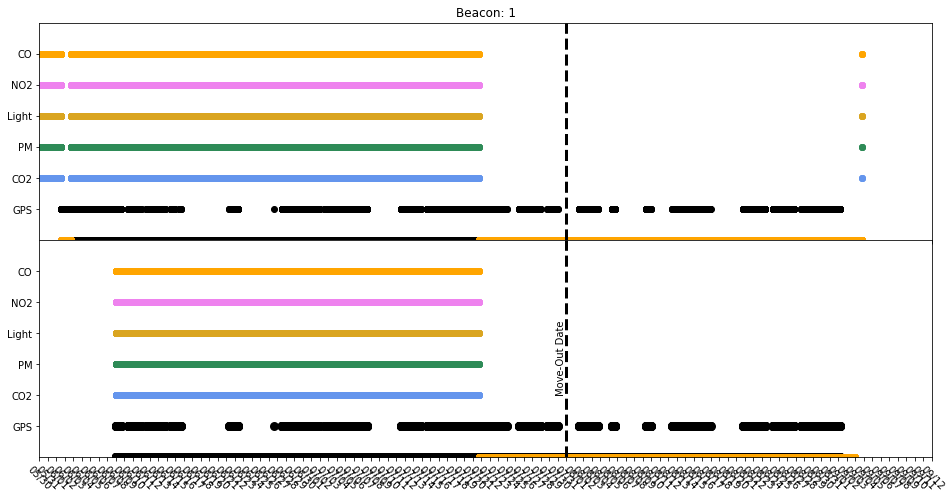

No end date


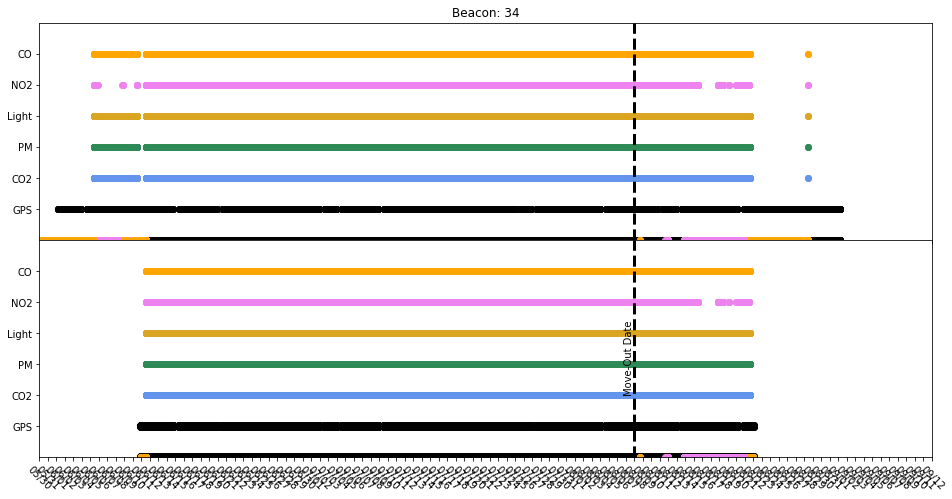

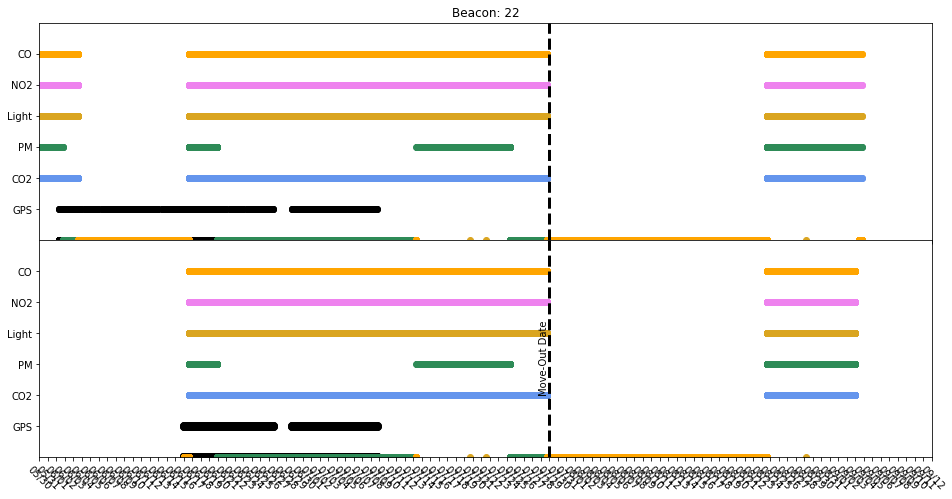

No end date


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


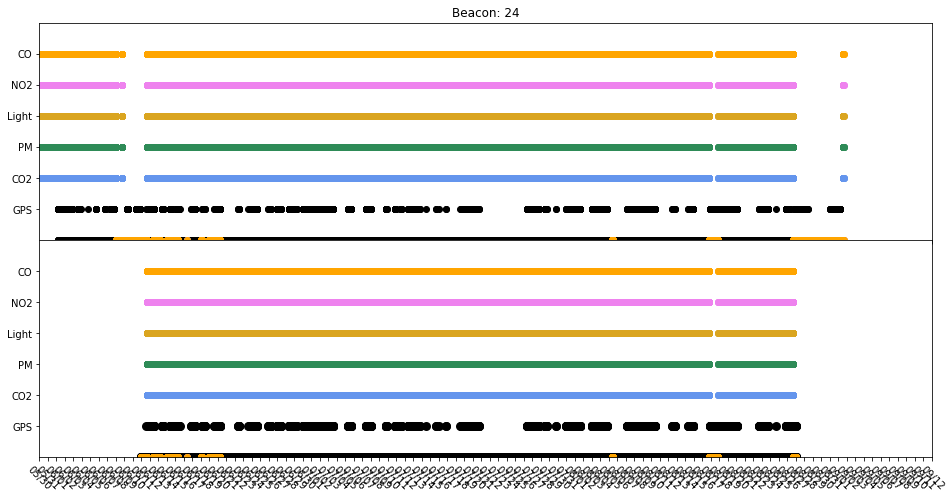

No end date


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


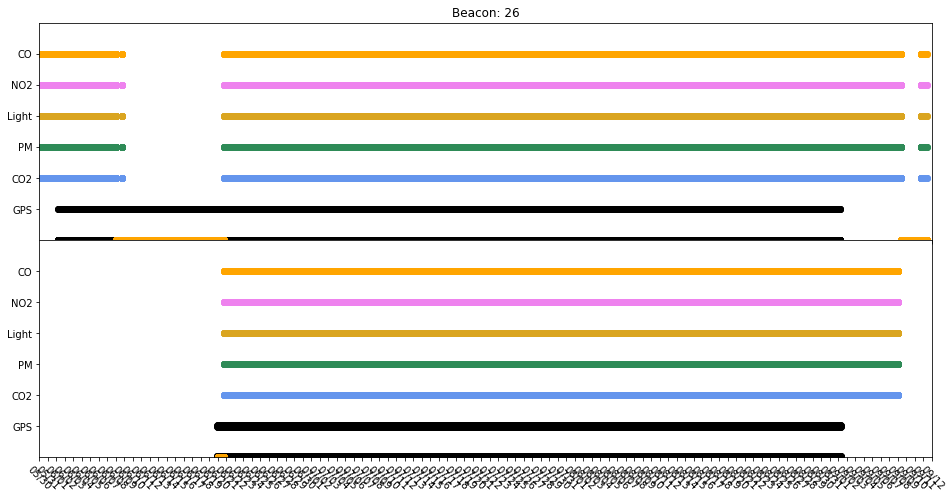

No end date


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


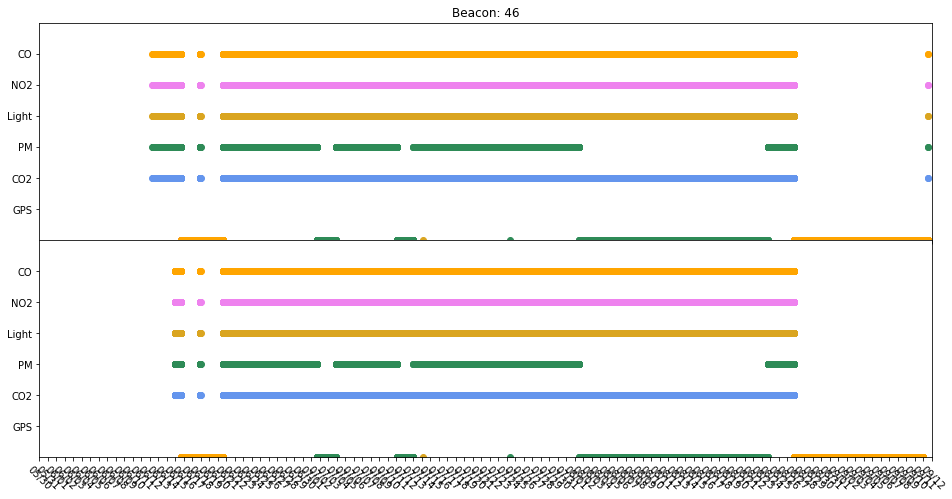

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


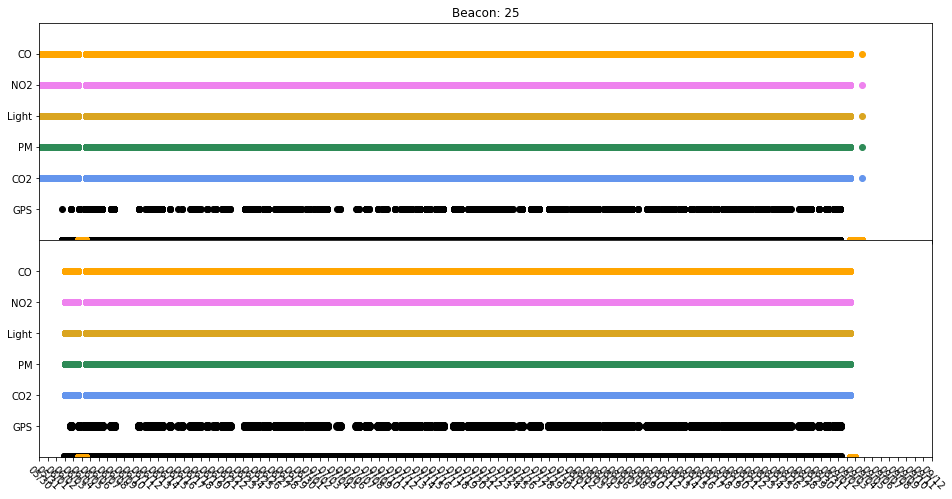

No end date
No end date
No end date


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


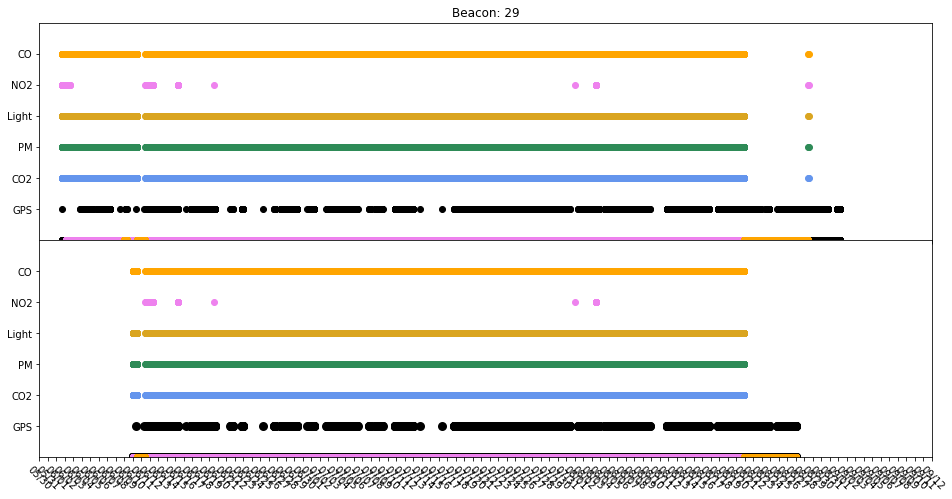

No end date


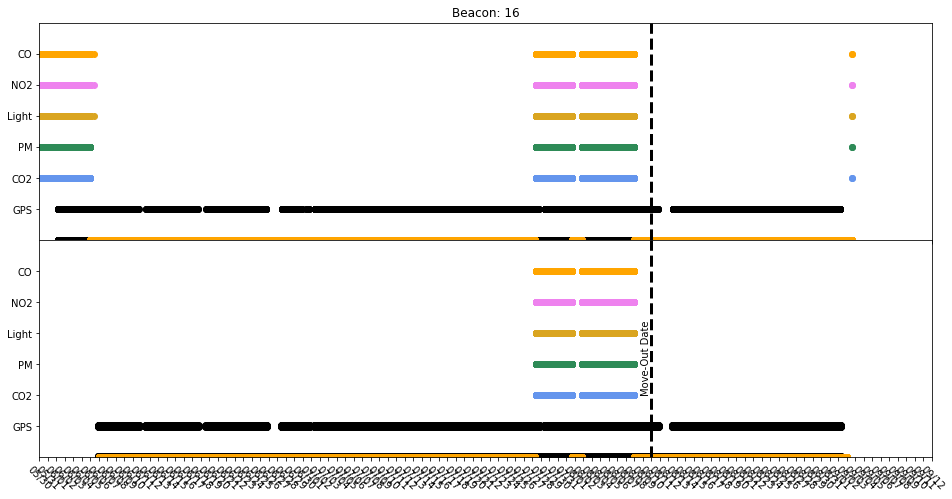

No end date


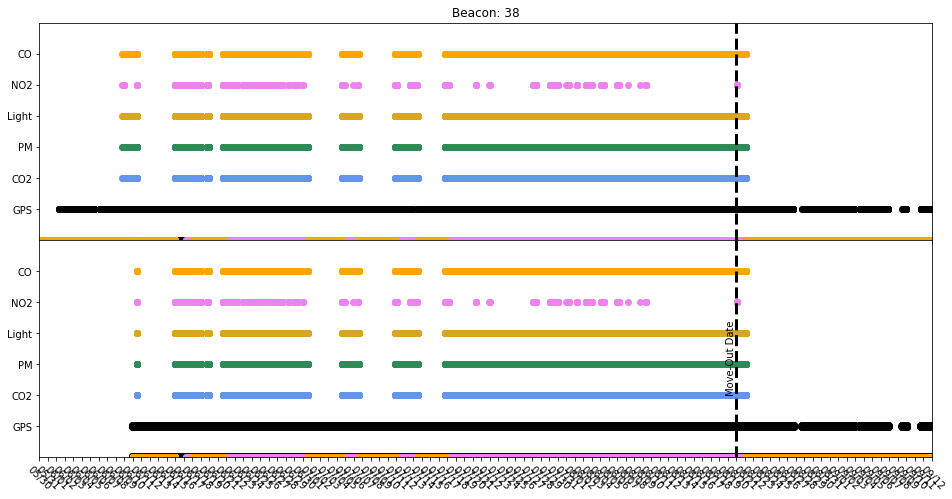

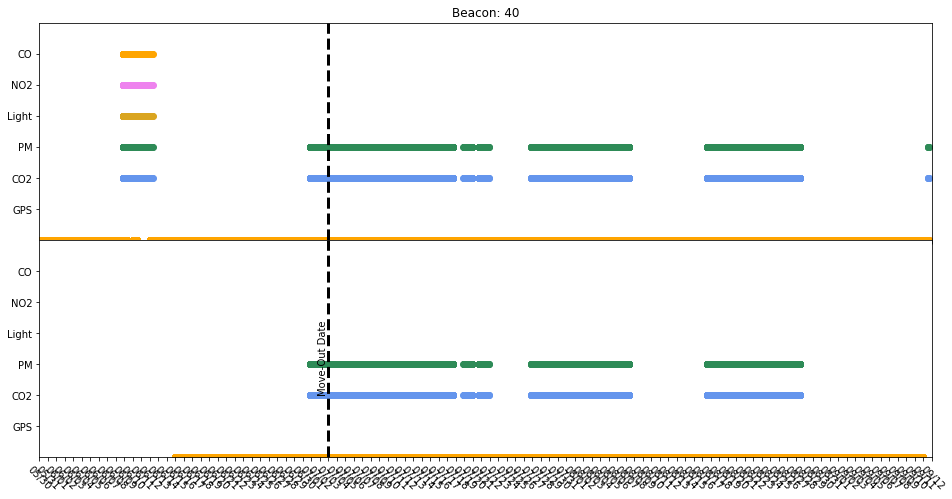

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


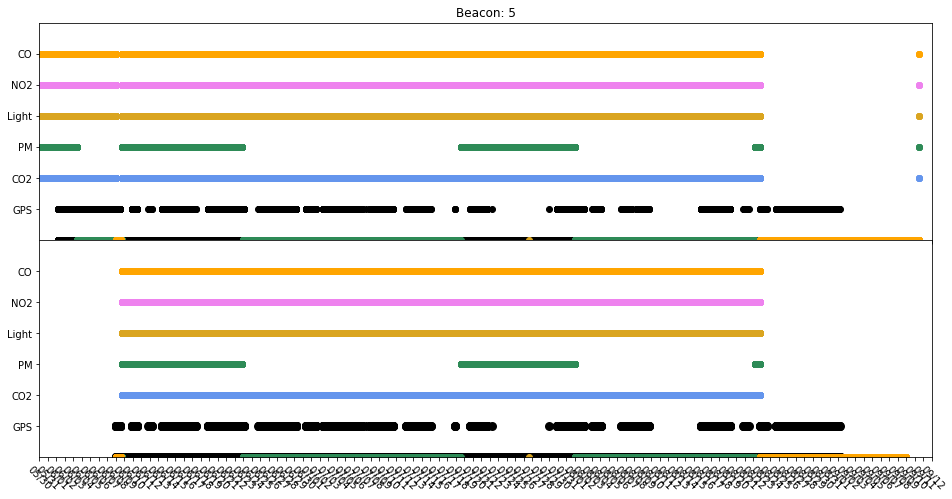

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


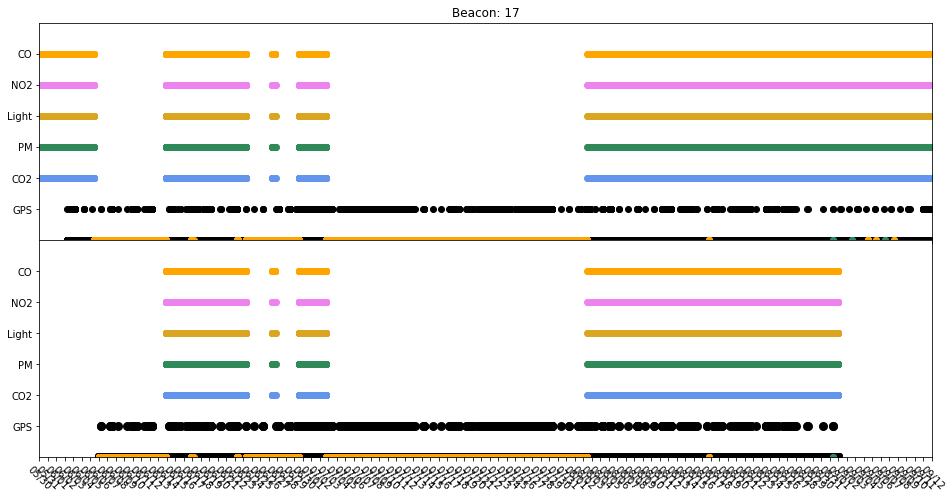

No end date


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


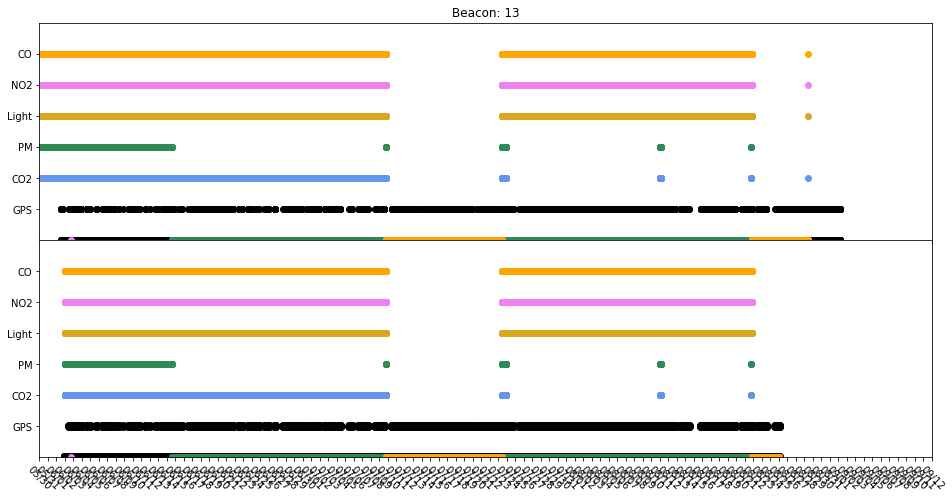

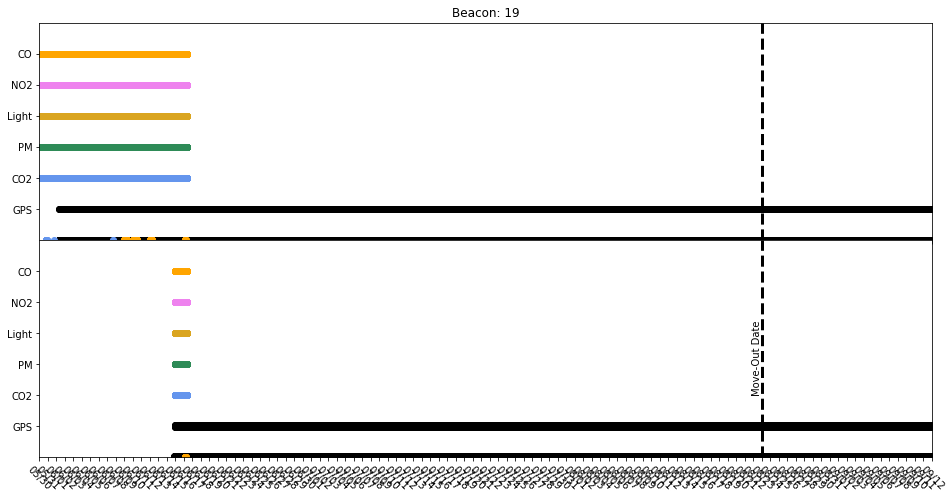

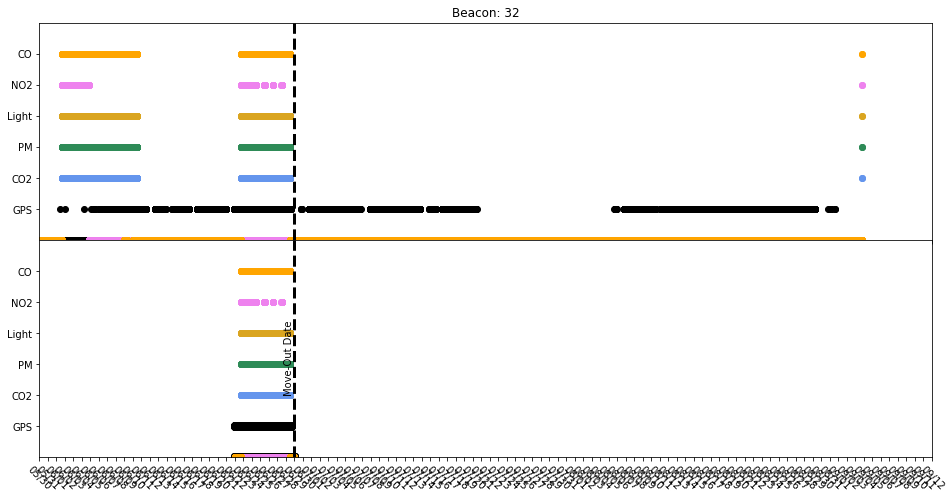

No end date


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


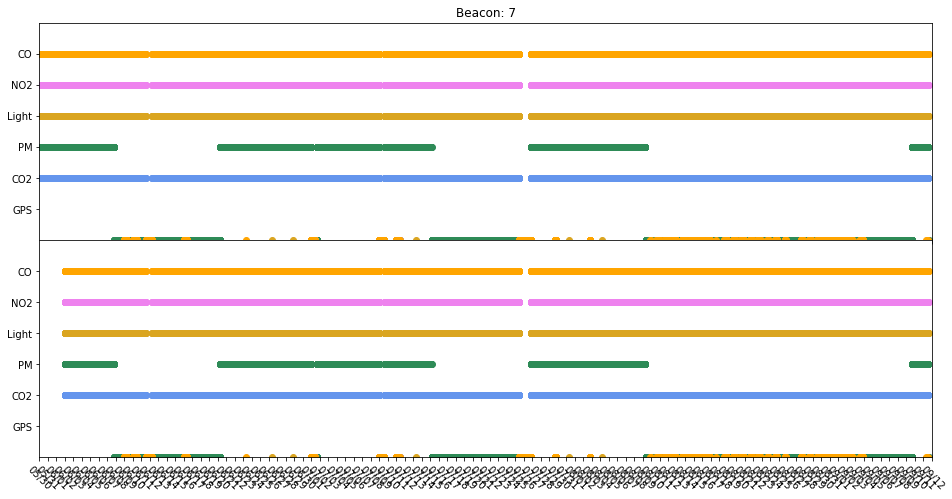

In [7]:
for beiwe in beacon_data['Beiwe'].unique():
    
    gps_by_beiwe = gps_data[gps_data['Beiwe'] == beiwe]
    gps_by_beiwe['GPS_op'] = np.select([pd.to_numeric(gps_by_beiwe['Lat'],errors='coerce') > 0],[1])
    
    beacon_by_beiwe = beacon_data[beacon_data['Beiwe'] == beiwe]
    beacon_by_beiwe['CO2_op'] = np.select([pd.to_numeric(beacon_by_beiwe['CO2'],errors='coerce') > 0],[2])
    beacon_by_beiwe['PM_op'] = np.select([pd.to_numeric(beacon_by_beiwe['PM_C_2p5'],errors='coerce') > 0],[3])
    beacon_by_beiwe['Lux_op'] = np.select([pd.to_numeric(beacon_by_beiwe['Lux'],errors='coerce') > -10],[4])
    beacon_by_beiwe['NO2_op'] = np.select([pd.to_numeric(beacon_by_beiwe['NO2'],errors='coerce') > -5],[5])
    beacon_by_beiwe['CO_op'] = np.select([pd.to_numeric(beacon_by_beiwe['CO'],errors='coerce') > -5],[6])
    
    start_date = id_crossover[id_crossover['Beiwe'] == beiwe]['start_date'].values[0]
    end_date = id_crossover[id_crossover['Beiwe'] == beiwe]['end_date'].values[0]
    move_date = id_crossover[id_crossover['Beiwe'] == beiwe]['move_date'].values[0]
    
    if np.isnat(end_date):
        print('No end date')
    else:
        beacon_by_beiwe_study = beacon_by_beiwe[start_date:end_date]
        gps_by_beiwe_study = gps_by_beiwe[start_date:end_date]
        
        fig,ax = plt.subplots(2,1,figsize=(16,8),sharex=True,sharey=True)
        
        # Available data
        avail_ax = ax[0]
        avail_ax.scatter(gps_by_beiwe.index,gps_by_beiwe['GPS_op'],color='black')
        avail_ax.scatter(beacon_by_beiwe.index,beacon_by_beiwe['CO2_op'],color='cornflowerblue')
        avail_ax.scatter(beacon_by_beiwe.index,beacon_by_beiwe['PM_op'],color='seagreen')
        avail_ax.scatter(beacon_by_beiwe.index,beacon_by_beiwe['Lux_op'],color='goldenrod')
        avail_ax.scatter(beacon_by_beiwe.index,beacon_by_beiwe['NO2_op'],color='violet')
        avail_ax.scatter(beacon_by_beiwe.index,beacon_by_beiwe['CO_op'],color='orange')
        
        avail_ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        avail_ax.xaxis.set_major_locator(mdates.DayLocator())
        avail_ax.axvline(move_date,color='black',linewidth=3,linestyle='dashed')
        b = beacon_by_beiwe['Beacon'][0]
        avail_ax.set_title(f'Beacon: {b}')
        avail_ax.set_xlim([datetime(2020,5,30),datetime(2020,9,12)])
        avail_ax.set_ylim([0,7])
        plt.yticks([1,2,3,4,5,6],['GPS','CO2','PM','Light','NO2','CO'])
        
        # Beginning Restricted data
        restrict_ax = ax[1]
        restrict_ax.scatter(gps_by_beiwe_study.index,gps_by_beiwe_study['GPS_op'],linewidth=3,color='black')
        restrict_ax.scatter(beacon_by_beiwe_study.index,beacon_by_beiwe_study['CO2_op'],color='cornflowerblue')
        restrict_ax.scatter(beacon_by_beiwe_study.index,beacon_by_beiwe_study['PM_op'],color='seagreen')
        restrict_ax.scatter(beacon_by_beiwe_study.index,beacon_by_beiwe_study['Lux_op'],color='goldenrod')
        restrict_ax.scatter(beacon_by_beiwe_study.index,beacon_by_beiwe_study['NO2_op'],color='violet')
        restrict_ax.scatter(beacon_by_beiwe_study.index,beacon_by_beiwe_study['CO_op'],color='orange')
        restrict_ax.axvline(move_date,color='black',linewidth=3,linestyle='dashed')
        restrict_ax.text(move_date,2,'Move-Out Date',va='bottom',ha='right',rotation='vertical')
        
        restrict_ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        restrict_ax.xaxis.set_major_locator(mdates.DayLocator())
        restrict_ax.tick_params(axis='x',labelrotation=-45)
        restrict_ax.set_ylim([0,7])
        plt.yticks([1,2,3,4,5,6],['GPS','CO2','PM','Light','NO2','CO'])
        
        plt.subplots_adjust(hspace=0)
        plt.savefig(f'../reports/figures/bpeace2_operation/beacon{b}_operation_schedule.png')
        plt.show()
        plt.close()